DỰ PHÓNG KẾT QUẢ KINH DOANH

ĐỊNH GIÁ

In [1088]:
# tính chỉ số BVPS
# tổng giá trị sổ sách = VCSH
import csv 
import pandas as pd 

df = pd.read_csv("D:\project\cafeF_crawler\dataset\cdkt_năm.csv")

In [1089]:
df['2020'] = df['2020'].str.replace(",","").astype(float)
df['2021'] = df['2021'].str.replace(",","").astype(float)
df['2022'] = df['2022'].str.replace(",","").astype(float)
df['2023'] = df['2023'].str.replace(",","").astype(float)

In [1090]:
df.dtypes

chỉ tiêu     object
2020        float64
2021        float64
2022        float64
2023        float64
dtype: object

In [1091]:
# tìm tổng giá tị sổ sách 
VCSH = df.iloc[[52]].reset_index(drop=True)
VCSH

,chỉ tiêu,2020,2021,2022,2023
0,VIII.Vốn chủ sở hữu,7.964661e+13,8.632903e+13,1.041900e+14,1.229170e+14


In [1092]:
CC = df.iloc[[46]].reset_index(drop=True)
CC

,chỉ tiêu,2020,2021,2022,2023
0,a.Vốn điều lệ,4.022018e+13,5.058524e+13,5.058524e+13,5.700436e+13


In [1093]:
CC.dtypes

chỉ tiêu     object
2020        float64
2021        float64
2022        float64
2023        float64
dtype: object

In [1094]:
# mệnh giá mặc định của cổ phiếu(Par value) là 10,000vnd
# số lượng cổ phiếu đang lưu hành(OS) = vốn điều lệ(CC)/mệnh giá cổ phiếu 
OS_cols = [ '2020', '2021', '2022', '2023']
OS = CC[OS_cols].copy() 
PV = 10000
OS = OS/PV
OS["chỉ tiêu"] = "số lượng cổ phiếu đang lưu hành"
OS

,2020,2021,2022,2023,chỉ tiêu
0,4.022018e+09,5.058524e+09,5.058524e+09,5.700436e+09,số lượng cổ phiếu đang lưu hành


In [1095]:
# tính BVPS = vốn chủ sở hữu/ số lượng cổ phiếu đang lưu hành 
BVPS_cols = [ '2020', '2021', '2022', '2023']
BVPS = VCSH[BVPS_cols].copy()
KL_cols = [ '2020', '2021', '2022', '2023']
KL = OS[KL_cols].copy()
BVPS = BVPS/KL
BVPS["chỉ tiêu"] = "BVPS"
BVPS

,2020,2021,2022,2023,chỉ tiêu
0,19802.649317,17066.05083,20596.916622,21562.744702,BVPS


SỬ DỤNG MÔ HÌNH HỒI QUY ĐỂ DỰ BÁO BVPS TRONG TƯƠNG LAI 

In [1096]:
import numpy as np
Y= BVPS[BVPS.columns[:-1]].to_numpy().reshape(4,1)
X = BVPS.columns[:-1].to_numpy(int).reshape(4,1)

In [1097]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [1098]:
X_pred = np.array([2024]).reshape(1,1)
Y_pred = model.predict(X_pred).reshape(-1)
Y_pred

array([21959.87835439])

In [1099]:
BVPS["2024"] = Y_pred
BVPS = BVPS[["2020","2021","2022","2023","2024","chỉ tiêu"]]
BVPS

,2020,2021,2022,2023,2024,chỉ tiêu
0,19802.649317,17066.05083,20596.916622,21562.744702,21959.878354,BVPS


Tìm giá cổ phiếu của mỗi năm 

In [1100]:
df10 = pd.read_csv('D:\project\cafeF_crawler\dataset\BID.csv')

In [1102]:
df10["ngày"] = pd.to_datetime(df10["ngày"])

In [1103]:
df10_2024 = df10[df10['ngày'].dt.year == 2024]

In [1105]:
# df10_2024.to_csv("dataset/giá_cổ_phiếu_năm_2024.csv", index = False) 

In [1106]:
df1 = pd.read_csv("dataset\giá_cổ_phiếu_năm_2020.csv")
df2 = pd.read_csv("dataset\giá_cổ_phiếu_năm_2021.csv")
df3 = pd.read_csv("dataset\giá_cổ_phiếu_năm_2022.csv")
df4 = pd.read_csv("dataset\giá_cổ_phiếu_năm_2023.csv")
df5 = pd.read_csv("dataset\giá_cổ_phiếu_năm_2024.csv")


tính PB của từng năm

In [1107]:
df1['ngày'] = pd.to_datetime(df1['ngày'])
bvps = 19802.65
df1['PB'] = df1['đóng_cửa']/bvps
PB1 = df1[['ngày', 'PB']]

In [1108]:
df2['ngày'] = pd.to_datetime(df2['ngày'])
bvps = 17066.05083
df2['PB'] = df2['đóng_cửa']/bvps
PB2 =df2[['ngày', 'PB']]

In [1109]:
df3['ngày'] = pd.to_datetime(df3['ngày'])
bvps = 20596.916622
df3['PB'] = df3['đóng_cửa']/bvps
PB3 = df3[['ngày', 'PB']]

In [1110]:
df4['ngày'] = pd.to_datetime(df4['ngày'])
bvps = 21562.744702
df4['PB'] = df4['đóng_cửa']/bvps
PB4 = df4[['ngày', 'PB']]

In [1111]:
df5['ngày'] = pd.to_datetime(df5['ngày'])
bvps = 21959.878354
df5['PB'] = df5['đóng_cửa']/bvps
PB5 = df5[['ngày', 'PB']]

In [1112]:
PB = pd.concat([PB5, PB4, PB3, PB2, PB1], ignore_index=True)
PB

,ngày,PB
0,2024-08-22,2.290541
1,2024-08-21,2.304202
2,2024-08-20,2.238173
3,2024-08-19,2.181251
4,2024-08-16,2.163036
...,...,...
1202,2020-01-08,2.378470
1203,2020-01-07,2.358270
1204,2020-01-06,2.312822
1205,2020-01-03,2.358270


In [1113]:
PB.to_csv("dataset/PB.csv", index = False) 

In [1114]:
# tính giá trung bình của PB 
avg = PB['PB'].mean()
avg

2.130743215919182

In [1115]:
# tính độ lệch chuẩn của cột PB 
df = pd.read_csv('dataset/PB.csv')

std = df['PB'].std()
std

0.2902506236767536

In [1116]:
std_plus_1 = avg + std 
std_plus_1 

2.4209938395959356

In [1117]:
std_plus_2 = avg + 2*std 
std_plus_2 

2.7112444632726893

In [1118]:
std_minus_1 = avg - std 
std_minus_1 

1.8404925922424282

In [1119]:
std_minus_2 = avg - 2*std
std_minus_2

1.5502419685656748

SỬ DỤNG MÔ HÌNH HỒI QUY ĐỂ DỰ ĐOÁN P/B TRONG TƯƠNG LAI

In [1120]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

df = pd.DataFrame(PB)
df['ngày'] = pd.to_datetime(df['ngày'])
df['ngày_num'] = (df['ngày'] - df['ngày'].min()).dt.days

# Tạo mô hình hồi quy tuyến tính
X = df[['ngày_num']]
y = df['PB']

model = LinearRegression()
model.fit(X, y)

# Dự đoán giá trị PB từ ngày hôm nay đến ngày 31 tháng 12 năm 2024
future_dates = pd.date_range(start=df['ngày'].max() + pd.Timedelta(days=1), end='2024-12-31')
future_dates_num = (future_dates - df['ngày'].min()).days
future_dates_df = pd.DataFrame({'ngày_num': future_dates_num})

future_predictions = model.predict(future_dates_df)

# Kết quả dự đoán
predictions_df = pd.DataFrame({'Ngày': future_dates, 'Dự đoán PB': future_predictions})



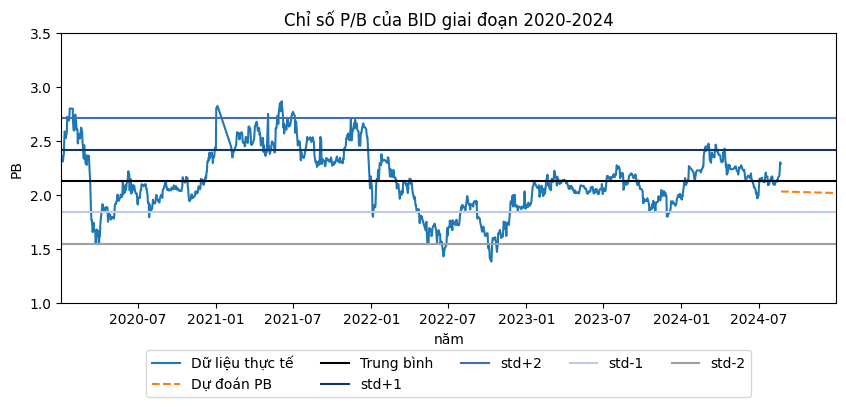

In [1121]:
# Visualize biểu đồ dự đoán P/B của BID 
# vẽ PB 
plt.figure(figsize=(10,3.5))
plt.plot(df['ngày'], df['PB'], label='Dữ liệu thực tế')
plt.plot(future_dates, future_predictions, label='Dự đoán PB', linestyle='--')

# vẽ đường trung bình
plt.axhline(y=avg, color='black', linestyle='-', label='Trung bình') 

# vẽ các đường std
plt.axhline(y=std_plus_1, color='#103667', linestyle='-', label='std+1')
plt.axhline(y=std_plus_2, color='#426EB4', linestyle= '-', label= 'std+2')
plt.axhline(y=std_minus_1, color = '#BFCAE6', linestyle='-', label= 'std-1')
plt.axhline(y=std_minus_2, color= '#A0A0A0', linestyle='-', label='std-2')

# vẽ biểu đồ
plt.xlabel('năm')
plt.ylabel('PB')
plt.title('Chỉ số P/B của BID giai đoạn 2020-2024')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.xlim(df['ngày'].min(), future_dates[-1]) 
plt.ylim(1,3.5)
plt.show()

    VISUALIZE GIÁ CỔ PHIẾU BID

In [1129]:
df = pd.read_csv('dataset/BID.csv')

C:\Users\Barbara Kieu\AppData\Local\Temp\ipykernel_4284\341668238.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


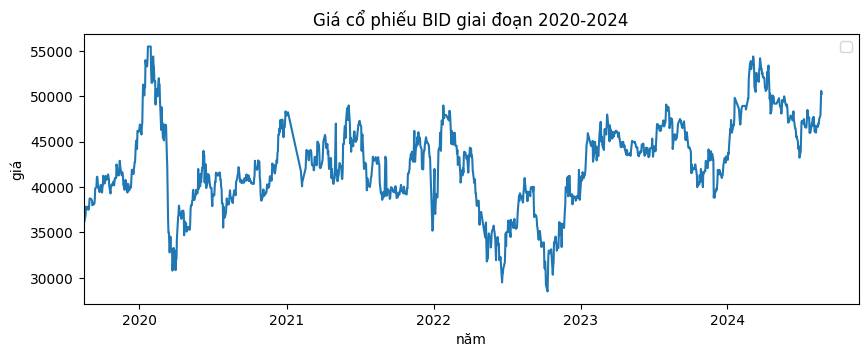

In [1136]:
df['ngày'] = pd.to_datetime(df['ngày'])
df['ngày_num'] = (df['ngày'] - df['ngày'].min()).dt.days

plt.figure(figsize=(10,3.5))
plt.plot(df['ngày'], df['đóng_cửa'])

# vẽ biểu đồ
plt.xlabel('năm')
plt.ylabel('giá')
plt.title('Giá cổ phiếu BID giai đoạn 2020-2024')
plt.legend()
plt.xlim(df['ngày'].min()) 
plt.show()

ĐỊNH GIÁ CỔ PHIẾU BID NĂM 2024

In [1122]:
# giá thị trường với kịch bản tích cực
# P/B = giá cổ phiếu thị trường/ giá trị sổ sách 
price = std_plus_1 *Y_pred
price

array([53164.73021426])

In [1123]:
# giá thị trường với kịch bản tiêu cực 
price = std_minus_1*Y_pred
price

array([40416.9934378])

ROE?

In [1124]:
df = pd.read_csv("D:\\project\\cafeF_crawler\\dataset\\tình_hình_kinh_tế.csv")

In [1125]:
df['2020'] = df['2020'].str.replace(",","").astype(float)
df['2021'] = df['2021'].str.replace(",","").astype(float)
df['2022'] = df['2022'].str.replace(",","").astype(float)
df['2023'] = df['2023'].str.replace(",","").astype(float)

In [1126]:
# lợi nhuận ròng
net_profit = df.iloc[[3]].reset_index(drop=True)
net_profit

,chỉ tiêu,2020,2021,2022,2023
0,Lợi nhuận ròng,6.996622e+12,1.054014e+13,1.815850e+13,2.150492e+13


In [1127]:
# VCSH
VCSH

,chỉ tiêu,2020,2021,2022,2023
0,VIII.Vốn chủ sở hữu,7.964661e+13,8.632903e+13,1.041900e+14,1.229170e+14


In [1128]:
# ROE = lợi nhuận ròng/ VCSH
ROE_cols = ['2020', '2021', '2022', '2023']
ROE = net_profit[ROE_cols].copy()
np_cols = ['2020', '2021', '2022', '2023']
np = VCSH[np_cols].copy()
ROE = (ROE/np)*100
ROE["chỉ tiêu"] = "ROE"
ROE
# kết quả ROE sai tại vì LỢI NHUẬN RÒNG SAI DỮ LIỆU 

,2020,2021,2022,2023,chỉ tiêu
0,8.784582,12.209263,17.428259,17.495473,ROE
